# Bank Account Fraudulent Application Detection (1)--Pre-model Analysis
Process and visualize data, recognize fraud patterns, get insights of features and target.

## Introduction
Fraudulent applications for a new bank account are major concerns for banks and financial institutions. Fraudsters use various techniques (identity theft, account takeover, phishing) to apply for fake bank accounts and make illegal activities. In this project, we will explore a dataset containing Bank Account Application records and build models to predict fraudulent applications in bank account opening process.

We will start with data cleaning and exploratory data analysis (EDA) to get a better understanding of the data. Secondly, we will perform data processing, feature engineering and modeling where we will build several classification models to identify fraudulent behaviors. We will also address the issue of imbalanced classes by using undersampling, oversampling, and SMOTE. Thirdly, we will evaluate the performance of the models and choose the best one based on various evaluation metrics such as PR-AUC and ROC-AUC, and establish the threshold by carefully balancing the trade-off between precision and recall to achieve the best overall performance. Finally, we will interpret the best model via shap to find the top 10 important features.

## 1.Understanding Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
from IPython import display
from summarytools import dfSummary

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [2]:
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

pandas==1.5.3
numpy==1.24.1
seaborn==0.12.2


### 1.1 Data Background

We will use the Kaggle dataset Bank Account Fraud (BAF) dataset (https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022) which comprises:<br>
1 million instances, out of which 11029 are fraudulent (1.1%);<br>
30 realistic features used in the fraud detection use-case; <br>
A column of “month”, providing temporal information about the dataset;<br>
Protected attributes, (age group, employment status and % income).

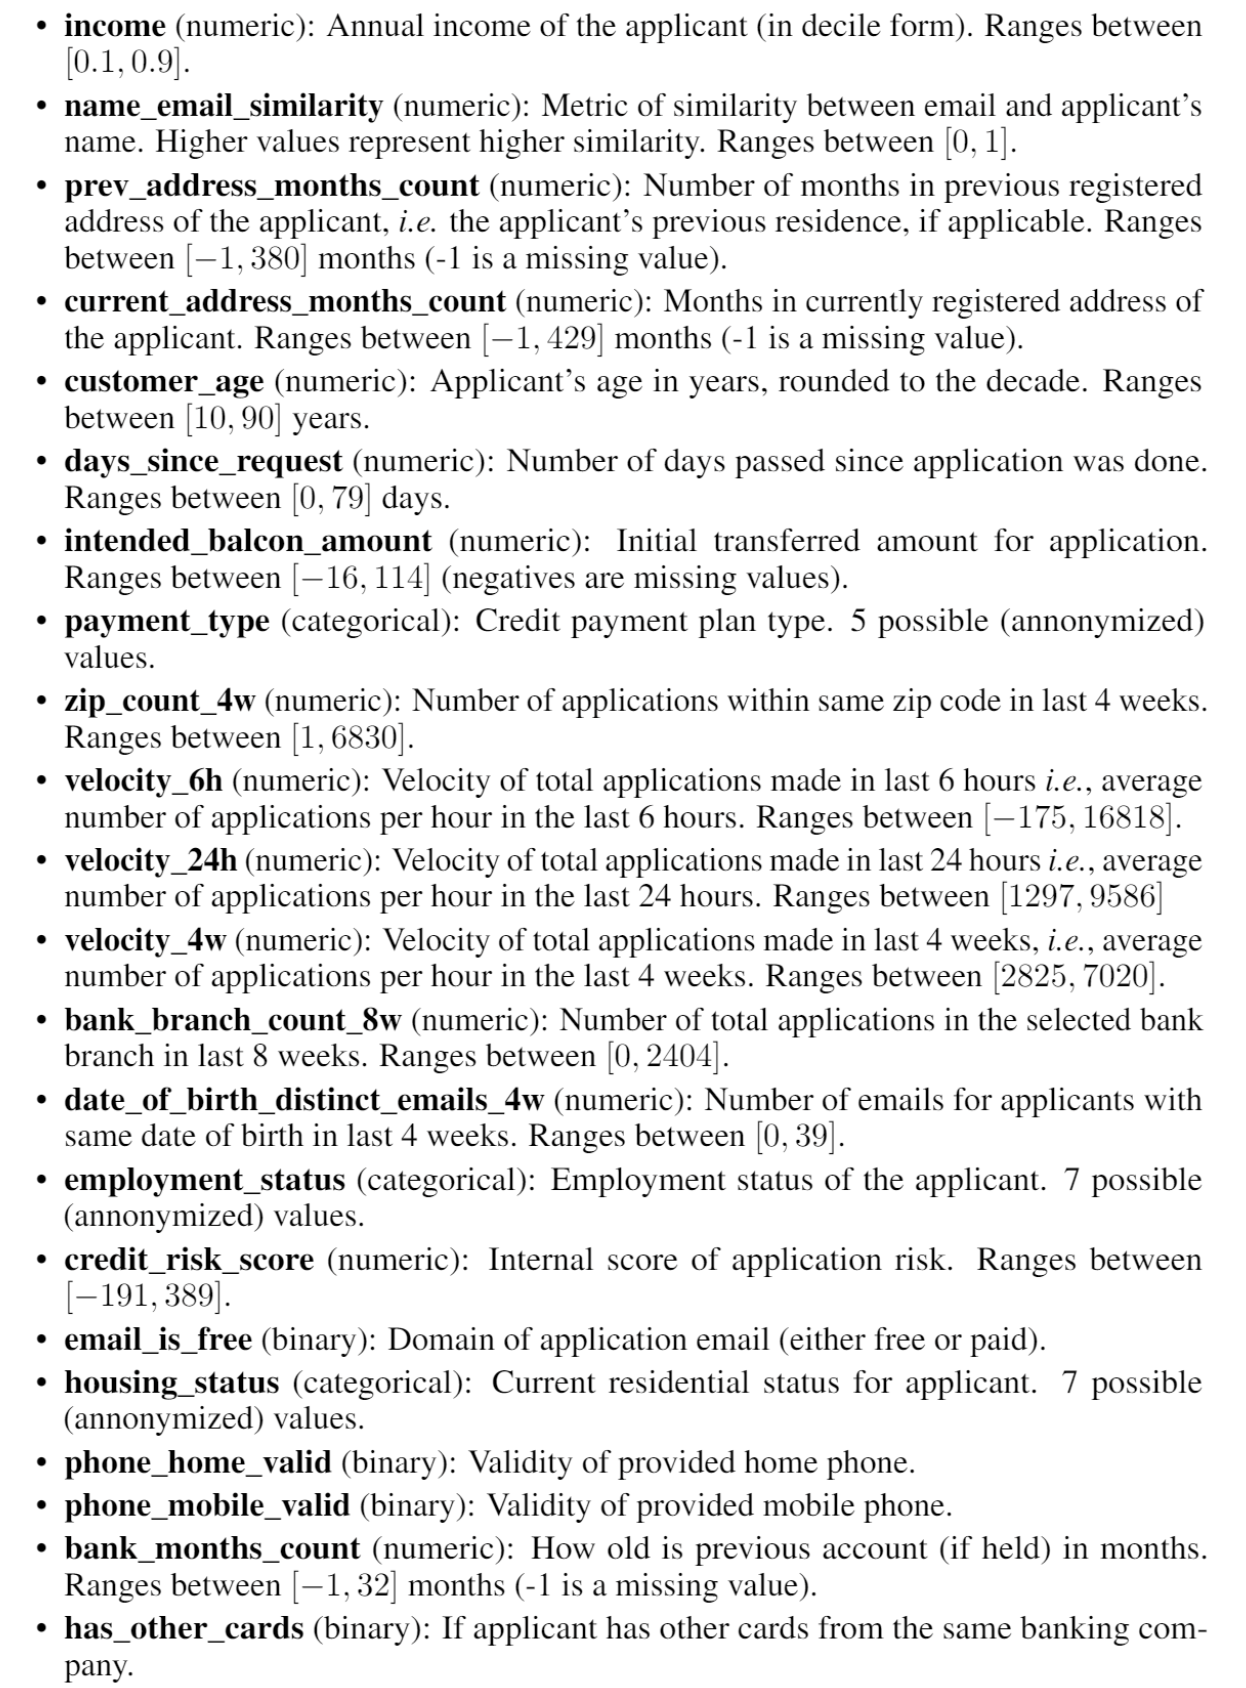

In [3]:
display.Image("data_dictionary1.png")

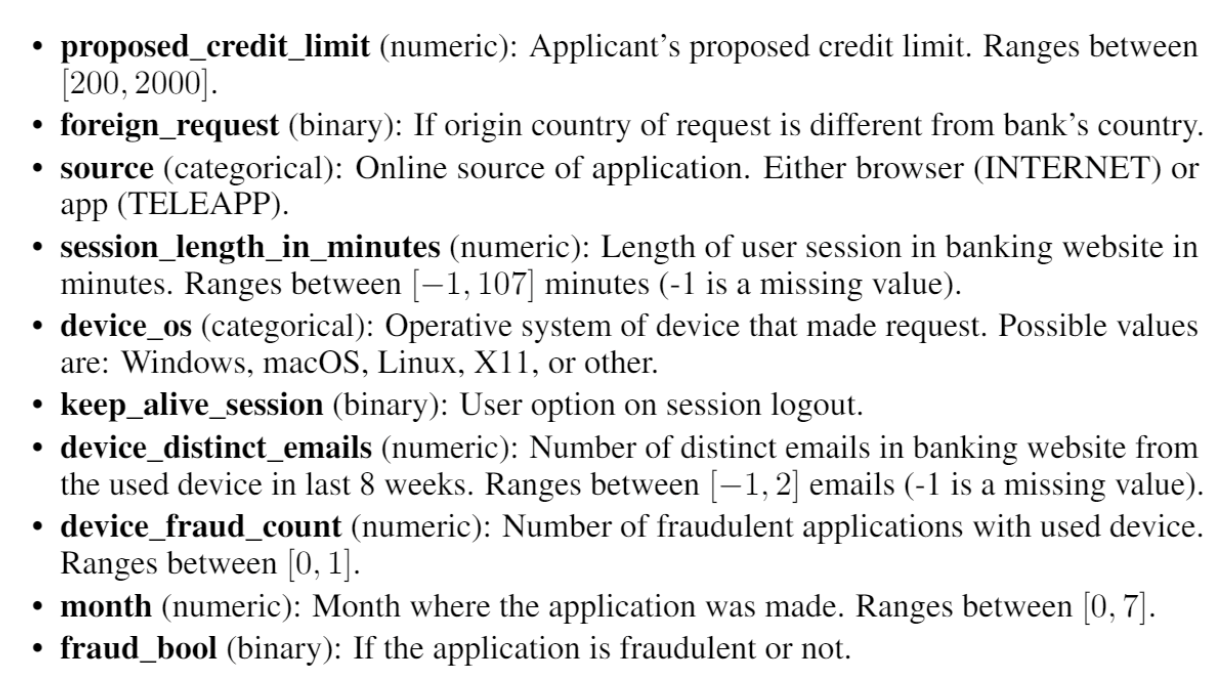

In [4]:
display.Image("data_dictionary2.png")

### 1.2 Get a glance of data

In [3]:
# Load the data
df = pd.read_csv('./data/Base.csv')
df.shape

(1000000, 32)

In [6]:
df.sample(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
396472,0,0.6,0.791591,-1,161,60,0.032812,21.138808,AA,1458,...,1,1000.0,0,INTERNET,5.536119,linux,1,1,0,1
73567,0,0.9,0.040240,27,44,60,0.019914,-0.524635,AB,404,...,0,1500.0,0,INTERNET,6.768389,windows,1,1,0,7
674883,0,0.7,0.092529,-1,43,20,0.001295,-1.146882,AC,1794,...,0,200.0,0,INTERNET,8.038826,windows,1,1,0,0
407904,0,0.3,0.725400,31,22,20,0.001460,29.445285,AA,1590,...,1,200.0,0,INTERNET,5.442558,other,1,1,0,1
148859,0,0.9,0.889688,27,4,50,0.008192,-0.643898,AC,1600,...,0,200.0,0,INTERNET,13.042362,other,1,1,0,3


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [8]:

dfSummary(df)

c:\Users\tliu1\miniconda3\lib\site-packages\summarytools\summarytools.py:124: RuntimeWarning: invalid value encountered in scalar divide
  stats += f"<br>IQR (CV) : {x.quantile(0.75) - x.quantile(0.25):.1f} ({x.mean()/x.std():.1f})"


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fraud_bool[int64],Mean (sd) : 0.0 (0.1)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 0.0 (0.1),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABiElEQVR4nO3XQWrbUBSG0XeLMTYUCdvgxXjeaRebRXg3JkiDOgTM66yTkDpWBulfzplK9+oNPiRUvfcG/7pvX30A+IjVvRuqattaWy/c/9p7vy6chT/+GmpVbQ+Hw89hGHZLls/z/FxVT2Lls+69UdfDMOxOp9N1HMeXRxZP07Q5n8+7y+Wybq0JlU+5++lvrbVxHF+Ox+OvBfu3C2bgDT9TRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEVZffQD+H1W1ba2tF46/9t6v7138UKjTNG0efeo0TZvb7bZqrQ1V9eg4eTb7/f7HOI7flwzP8/xcVU/vxfob+a03MHU2LOMAAAAASUVORK5CYII="">",0(0.0%)
2,income[float64],1. 0.92. 0.13. 0.84. 0.60000000000000015. 0.70000000000000016. 0.47. 0.28. 0.59. 0.3,"221,419 (22.1%)157,449 (15.7%)146,650 (14.7%)111,973 (11.2%)105,109 (10.5%)81,364 (8.1%)69,345 (6.9%)55,858 (5.6%)50,833 (5.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADlklEQVR4nO3cTWobWQBG0afGhM5Ewhi8GC+iF9uL0G6MsQadkIl60CSYDKJS/dyC9DkbUA0uz1TxPh+u1+uAwh97PwD/H2IjIzYyYiMjNjJiIyM2Mocxxucxxqe9H2SM8e16vX7Z+yHYzsPT09Nfx+Pxce8HuVwub4fD4W/B/b4ejsfj48vLy5fT6fR1r4d4f3//83w+P76+vn4aY4jtN/Uwxhin0+nr8/PzPzs/y+edf5+NeUEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIj8zDGf1d89nyIvX+fxsPlcnk7n8+PY+crPpfL5W2M8W3PZ2BbroWTOfhfH1SKk82JxRgjGLwYsvDdpoMXQxY+KgYvhiyMMXzUJSQ2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI7Pp4MWQhY82H7wYsvCda+FkDF7IeEEgs/WfUX9C+WHTdZVlFR9ttq6yrOJnW6+rLKv4wQsCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbmc3WVZZV/GzTdZVlFR+5Fk7GuorMWiebE4ybVhm8GLYwxeLBi2ELU601eDFs4SYfdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgsHrwYtjDVKoMXwxamcC2cjMELmTVONqcakywevBi7MNWiwYuxC/dYY/Bi7MIkPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZResqyyrusXhdZVnFVDYIZKyryMw92Zxm3G3WusqiijnuXldZVDHX3HWVRRV381GXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzN2DFyMX5po1eDFyYQ7XwskYvJC592RzojHbXYMXQxeWmDx4MXRhqXsHL4YuzOajLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkZm8rrKqYqm71lVWVSxhg0DGuorM1JPNicZik9ZVVlWs4ea6yqqKtUxdV1lVsZiPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGRuDl4MXVjLpMGLoQtrcC2cjMELmSknm1ONVdwcvBi7sJZfDl6MXVjTlMGLsQur8FGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjI/HJdZVnFmm6uqyyrWIsNAhnrKjJeEMiIjYzYyIiNjNjIiI3Mv+ZY4/O3OT2MAAAAAElFTkSuQmCC"">",0(0.0%)
3,name_email_similarity[float64],Mean (sd) : 0.5 (0.3)min < med < max:0.0 < 0.5 < 1.0IQR (CV) : 0.5 (1.7),"998,861 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACl0lEQVR4nO3cz2riUBiG8S9jLalCgn/QnTdQmIXgxguY5VzsXMIsXMzaO3AniERMG4wxsxgKhSmt5hjNe3h++5jAeRIT82FQlqUBTfft3gcAnOPh3geA5giC4MnMHh0+4lCW5eu1juc9QoWZ/Yt0MBj8jKKoV/UzdrvdNgiCX3XEWmuoTT5D8Z/HKIp68/n8NY7j7NKNkyQJF4tFb7PZPJqZTqhNP0PxsTiOs9Fo9FJx86erHsw7dV5RG32GQkvt96hNPUOhhZ+nIIFQIYFQIYFQIYFQIYFQIYFQIYFQIaHRQylFUbTNLAqCoMrmzAl4pLGhpmnazvP8+2QyabVarYtfwTIn4JfGhno4HB7CMOxMp9NsPB5vL9n23nMCjlNjTt8EDvuOTqdTu+p+69bYUN90u92qswJOcwIOCx72+/0fcRx3q+zX5ZvAZWItz/OwKIrnLMt+m1nV2YzaND7Ue3BdcDN7ns1mf4bD4e6Sba/wTVB5Ym21WvWWy2XneDy2Kuy3doT6MecFD8Mwv8c3gVm1ibXtdtvoSTVC/YSPC66K31Eh4csrqq9PkdDyaag+P0VCy1dXVG+fIqHlrIcpHipux/G1sbe3W94+9SsuuOtrY59vt7wMVXXBXV4bm/l9u+VlqOoLXvW1sc+3W16G+oYF9wc/+EOC11dU3Fadg+6Eiquoe9CdUHEVdQ+6Eyquqq5Bdx6mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIeGsP/JNkiS89IP3+31oZpamabherzu33F5136rH7br9OX39BWv0pKrynbdhAAAAAElFTkSuQmCC"">",0(0.0%)
4,prev_address_months_count[int64],Mean (sd) : 16.7 (44.0)min < med < max:-1.0 < -1.0 < 383.

### 1.3 Target and Base rate

In [9]:
target = 'fraud_bool'

In [10]:
df[target].value_counts()

0    988971
1     11029
Name: fraud_bool, dtype: int64

In [11]:
total_instances = len(df)
fraudulent_instances = df[target].sum()  # Assuming 1 represents fraud and 0 represents non-fraud

base_rate = (fraudulent_instances / total_instances) * 100
print(f"Base Rate: {base_rate:.2f}%")

Base Rate: 1.10%


## 2.Data Cleaning
Clean the data to handle issues like missing values, duplicates, and outliers. 

In [4]:
# Create a deep copy of the DataFrame
new_df = df.copy()

### 2.1 Handling Missing Values

In [5]:
# check for nulls, print columns with nulls
for col in new_df.columns:
    val=np.mean(new_df[col].isnull())
    if val != 0:
        print('{} -{}% nulls'.format(col,round(val*100)))


There is no null in the data. Based on Data background, the missing values are shown as negative numbers in the data.

##### 1). transform missing values to NaN

In [6]:
#get the columns with missing value
missingv_features1 = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count',
       'session_length_in_minutes', 'device_distinct_emails_8w']
missingv_features2 =['intended_balcon_amount']

In [7]:
for column in missingv_features1:
    new_df[column] = new_df[column].replace(-1, np.nan)

In [16]:
# new_df[misingv_features].isnull().sum()

In [8]:
#(new_df[missingv_features2] < 0).sum()
new_df[missingv_features2] = new_df[missingv_features2].mask(new_df[missingv_features2] < 0, np.nan)
#new_df[missingv_features2].isnull().sum()

In [18]:
##Code NOTES:
# replace all occurrences of -1 with NaN in a specific column 
#df.replace(-1, np.nan, inplace=True)   --> has bugs
#df['column_name'] = df['column_name'].replace(-1, np.nan)

#replace all numbers less than 1 with NaN 
#df = df.mask(df < 1, np.nan)
#df['column_name'] = df['column_name'].mask(df['column_name'] < 1, np.nan)
##replace all numbers less than 1 in the entire DataFrame with NaN
#df[df < 1] = np.nan

##### 2). percentage of missing value

In [ ]:
missing_features = missingv_features1 + missingv_features2
# dfSummary(new_df[missing_features])

In [106]:
total_values = new_df.shape[0]  # Total number of rows in the DataFrame

for col in missing_features:
    missing_values = new_df[col].isnull().sum()  # Count the number of missing values in each column
    missing_percentage = (missing_values / total_values) * 100  # Calculate the percentage of missing values
    print(f"'{col}' : Missing: {missing_values}, {missing_percentage:.2f}%")


'prev_address_months_count' : Missing: 712920, 71.29%
'current_address_months_count' : Missing: 4254, 0.43%
'bank_months_count' : Missing: 253635, 25.36%
'session_length_in_minutes' : Missing: 2015, 0.20%
'device_distinct_emails_8w' : Missing: 359, 0.04%
'intended_balcon_amount' : Missing: 742523, 74.25%


- <10% missing: 'current_address_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w'
- 10% - 50% missing: 'bank_months_count'
- \>50% missing: 'prev_address_months_count', 'intended_balcon_amount'

##### 3). predictive powers of missing values

A kernel density plot (KDE) to visualize the distribution of the count of missing values (missing_count) in rows of a DataFrame (new_df)

<Axes: xlabel='missing_count', ylabel='Density'>

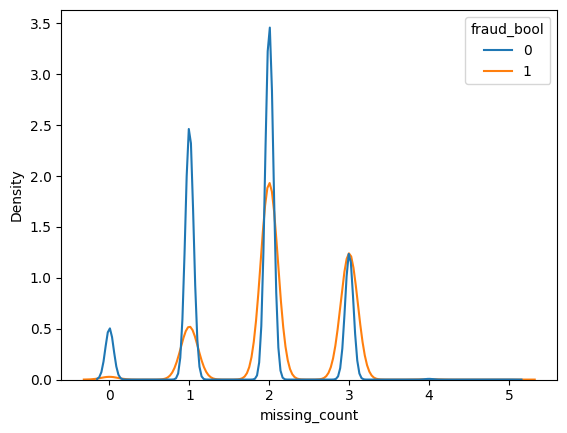

In [20]:
missing_count = new_df.isna().sum(axis=1)
df_temp = pd.DataFrame({"missing_count":missing_count,"fraud_bool":new_df['fraud_bool']})
sns.kdeplot(x='missing_count',data=df_temp,hue="fraud_bool",common_norm=False)

Self_Study Notes: 
The x-axis represents the count of missing values in each row (missing_count).
The y-axis represents the density of rows at a particular count of missing values.
By comparing the two KDEs (fraudulent and non-fraudulent), I can observe how the distribution of missing values differs between the two categories.
If there are noticeable differences in the shapes or peaks of the KDEs, it may suggest that the count of missing values is related to the likelihood of fraud.

Notable observations:<br>
1. missing_count 3 associated with higher fraud density, it suggests that the count of missing values may have some predictive power in fraudulent cases.

less than 10% missing

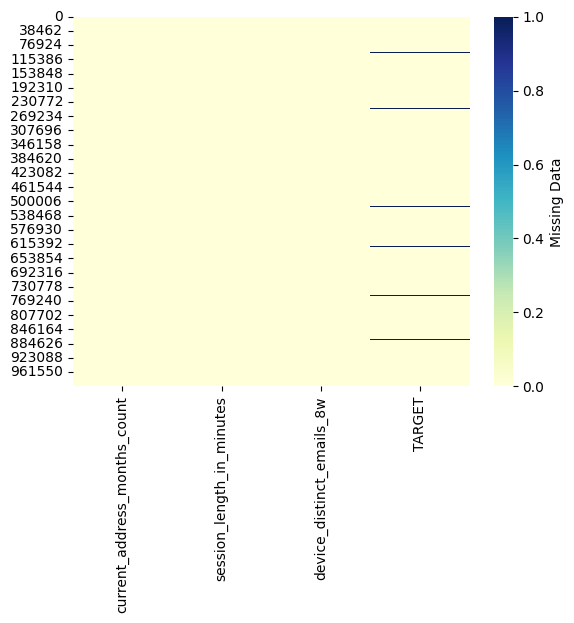

In [21]:
missing_small = ['current_address_months_count', 'session_length_in_minutes',
 'device_distinct_emails_8w',]
df_missing_small = new_df[missing_small].copy().isna().astype(float)
df_missing_small['TARGET']=new_df['fraud_bool']
sns.heatmap(df_missing_small,
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()

Self_study Notes: The heatmap provides a visual summary of data quality. It helps in identifying areas that may require imputation or cleaning.  The left axis represents the indices or labels of the rows in the DataFrame.

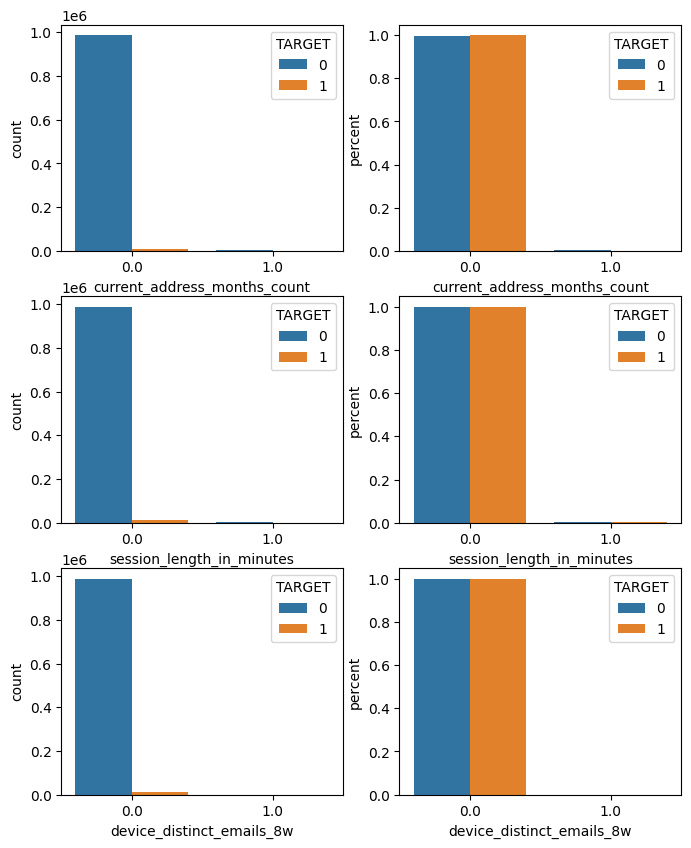

In [22]:
n_height = len(missing_small) # number of images vertically
n_width = 2 # number of images horizontally
figure_size = (8,10) # figure size
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)
for i in range(n_height):
    col = missing_small[i]    
    sns.countplot(data=df_missing_small, x=col, hue = "TARGET", ax = ax[i,0])
    pct = (df_missing_small.groupby([col,'TARGET']).size() / df_missing_small.groupby(['TARGET']).size()).reset_index().rename({0:'percent'}, axis=1)
    # calculates the percentage of missing values in a specific column (col) based on different values of TARGET
    sns.barplot(x=col, hue='TARGET', y='percent', data=pct, ax=ax[i,1])  

Notable observations:<br>
1. <10% Missingness does not have predictive power on TARGET. It'll be better to <b>impute missing values with mean or median</b>.

10-50% missing

<Axes: >

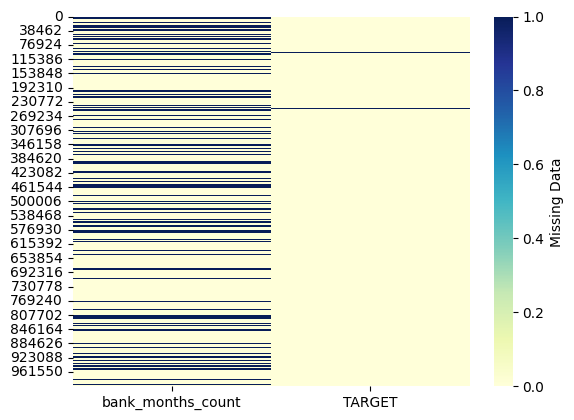

In [23]:

missing_medium = ['bank_months_count']
df_missing_medium = new_df[missing_medium].copy().isna().astype(float)
df_missing_medium['TARGET']=new_df['fraud_bool']
sns.heatmap(df_missing_medium,
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

This heatmap provides a visual summary of missing data patterns in the 'bank_months_count' column, with additional information about fraud events to facilitate exploratory data analysis and decision-making in data preprocessing and modeling tasks.<br>
Interpretation: 
- Darker areas in the heatmap indicate column('bank_months_count') where missing data is prevalent, suggesting potential data quality issues or areas for further investigation.
- Rows corresponding to fraud events (where 'fraud_bool' is True) are highlighted in the heatmap, allowing you to observe missing data patterns specifically for fraud cases, which can provide insights into whether missing data patterns differ between fraud and non-fraud cases.

<Axes: xlabel='bank_months_count', ylabel='percent'>

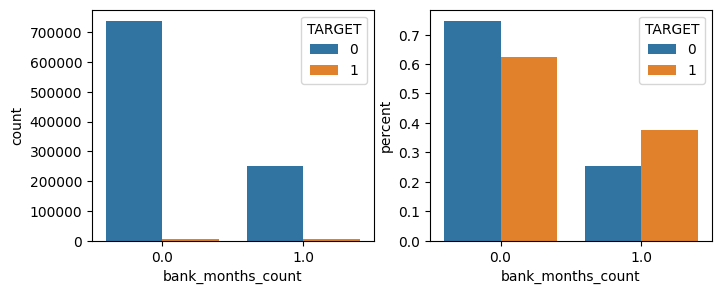

In [24]:
figure_size = (8,3) # figure size
fig, ax = plt.subplots(1, 2, figsize=figure_size)
col = missing_medium[0]
sns.countplot(data=df_missing_medium, x=col, hue = "TARGET", ax = ax[0])
pct = (df_missing_medium.groupby([col,'TARGET']).size() / df_missing_medium.groupby(['TARGET']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x=col, hue='TARGET', y='percent', data=pct, ax=ax[1])

Notable observations:<br>
25.4% Missingness has some predictive power on TARGET. <b>Leave it as it is so far.</b> <br>
fraudlent and legid applications have similar distribution.  fraudlent has a little bit high median than legit applications. No outliers. 

\>50% missing

<Axes: >

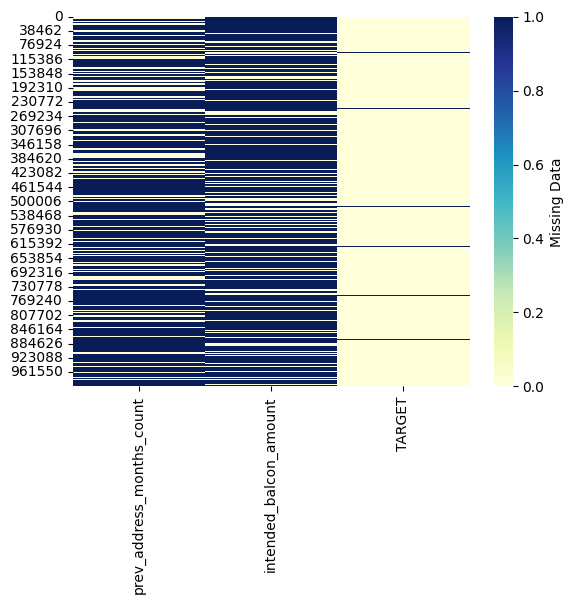

In [25]:
missing_large =['prev_address_months_count', 'intended_balcon_amount']
df_missing_large = new_df[missing_large].copy().isna().astype(float)
df_missing_large['TARGET']=new_df['fraud_bool']
sns.heatmap(df_missing_large,
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

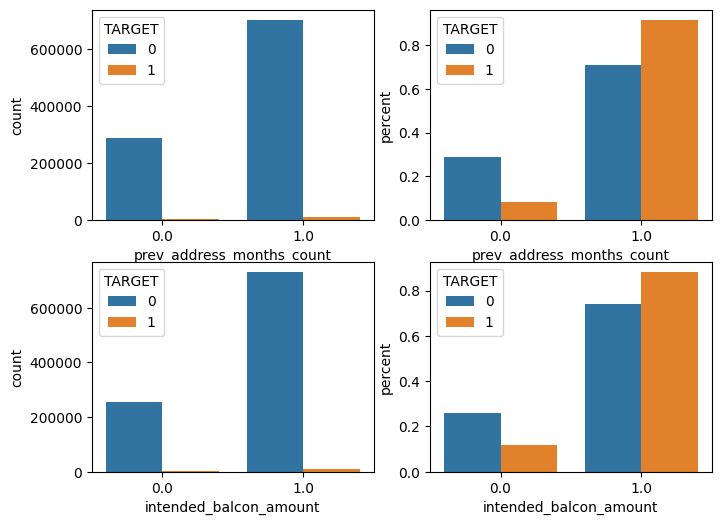

In [26]:
n_height = len(missing_large) # number of images vertically
n_width = 2 # number of images horizontally
figure_size = (8,6) # figure size
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)
for i in range(n_height):
    col = missing_large[i]
    sns.countplot(data=df_missing_large, x=col, hue = "TARGET", ax = ax[i,0])
    pct = (df_missing_large.groupby([col,'TARGET']).size() / df_missing_large.groupby(['TARGET']).size()).reset_index().rename({0:'percent'}, axis=1)
    # calculates the percentage of missing values in a specific column (col) based on different values of TARGET
    sns.barplot(x=col, hue='TARGET', y='percent', data=pct, ax=ax[i,1])

<Axes: xlabel='missing_count', ylabel='Density'>

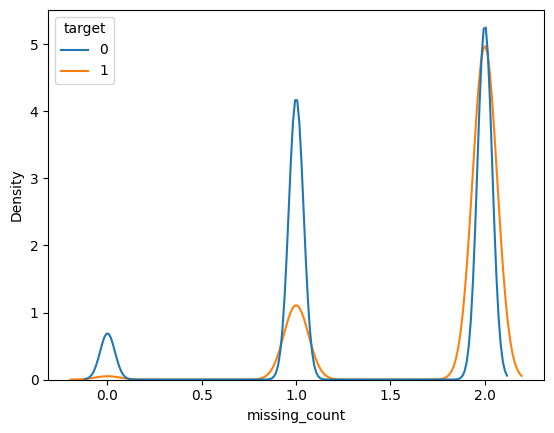

In [27]:
missing_count = new_df[missing_large].isna().sum(axis=1)
df_temp = pd.DataFrame({"missing_count":missing_count,"target":new_df['fraud_bool']})
sns.kdeplot(x='missing_count',data=df_temp,hue="target",common_norm=False)

Notable observations:<br>
>50% Missingness has some predictive power on TARGET. It'll be better to <b>transform them to "has_intended_balcon", "has_prev_address".</b>

'intended_balcon_amount': fraudlent and legit applications have similar distribution and very close median. 

"prev_address_months_count" : fraudlent and legit applications have similar distribution. fraudlent has a little bit high median than legit applications. Both of them have many outliers. 

### 2.2. Removing Duplicates

In [28]:
# Check for duplicate rows
duplicate_rows = new_df[new_df.duplicated()]
duplicate_rows

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month


In [29]:
# # remove duplicates
# new_df.drop_duplicates()

There isn't duplicates in the data.

### 2.3. Removing Constant Columns / Low variance Columns

In [38]:
# Get the names of the constant features
constant_features = [feature for feature in new_df.columns 
                     if new_df[feature].nunique() <=1]

# Print the names of the constant features
print(constant_features)

['device_fraud_count']


Notable observations: <br>
There is no fraud when applications are made using the used device. <b>Recommend to remove 'device_fraud_count'</b>.

### 2.4. Dealing with Outliers

#### Plot Outliers of Features by Fraud Status

In [31]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)
sns.set_style("whitegrid")
# Create a list of numeric features in the DataFrame new_df
numeric_features2 = [x for x in new_df.columns if new_df[x].nunique() >= 10]

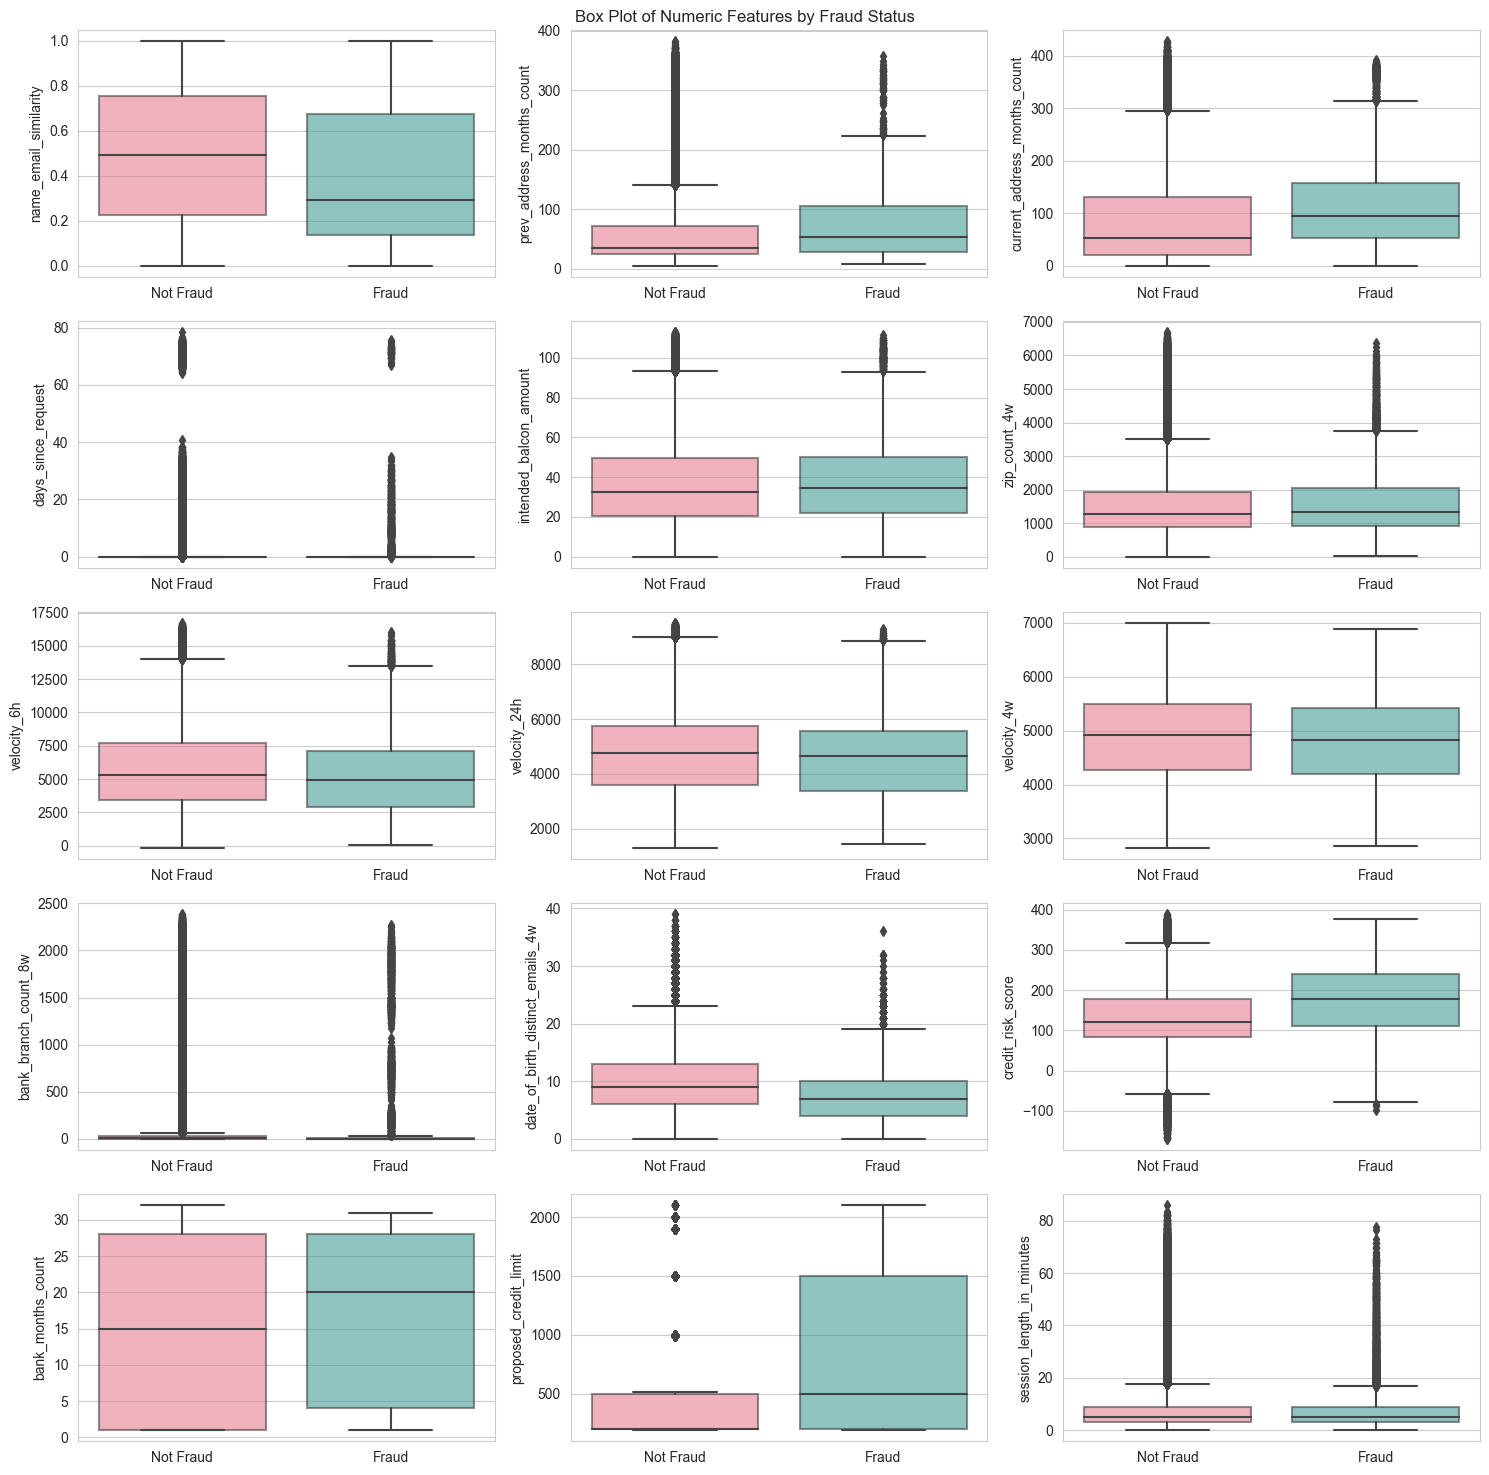

In [32]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features2):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=new_df, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

Removing outliers in the context of imbalanced data can pose challenges. Outliers may contain valuable information or represent rare instances of the minority class. Their removal can lead to information loss, distort the class distribution, introduce bias towards the majority class, and deviate from real-world scenarios

'proposed_credit_limit' is the specific credit limit/the maximum amount of credit that the applicant desires or believes they can responsibly manage based on their financial situation, spending habits, and borrowing needs.

In [12]:
#retrieve rows containing Not Fraud outliers in 'proposed_credit_limit' 

# Define a function to detect outliers using Z-score for a specific column
def detect_outliers_z_score_column(column, threshold=3):
    z_scores = np.abs((column - column.mean()) / column.std())
    return column[z_scores > threshold]

# Specify the column name with outliers (e.g., 'A' or 'C')
df_temp = new_df[new_df['fraud_bool']==0]

# Call the detect_outliers_z_score_column() function for the specified column
outliers = detect_outliers_z_score_column(df_temp['proposed_credit_limit'])

# Get rows containing outliers in the specified column
df_temp0 = df_temp[df_temp['proposed_credit_limit'].isin(outliers)]

In [13]:
df_temp0['proposed_credit_limit'].value_counts()

2000.0    5321
2100.0      36
Name: proposed_credit_limit, dtype: int64

In [15]:
df_temp2 = df_temp0[df_temp0['proposed_credit_limit']==2100.0]

## 3.Exploratory Data Analysis (EDA):  

Conduct EDA to gain insights into the data. Use visualizations such as histograms, scatter plots, box plots, and correlation matrices to understand relationships between variables and identify patterns.

In [39]:
# segragating categorical and continuous columns

features = list(new_df.columns)
target = "fraud_bool"
features.remove(target)

# Create a list of categorical features in the DataFrame new_df whose data type is `object`
cat_features = [x for x in new_df.columns if new_df[x].dtypes == "O"]

num_features = [i for i in features if i not in (cat_features + constant_features) ]
# Create a list of numeric features with nunique <10
num_features1 = [x for x in num_features if new_df[x].nunique() < 10]
# Create a list of numeric features with nunique >= 10
num_features2 = [x for x in new_df.columns if new_df[x].nunique() >= 10]


### 3.1. Categorical Columns

In [39]:
print(cat_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


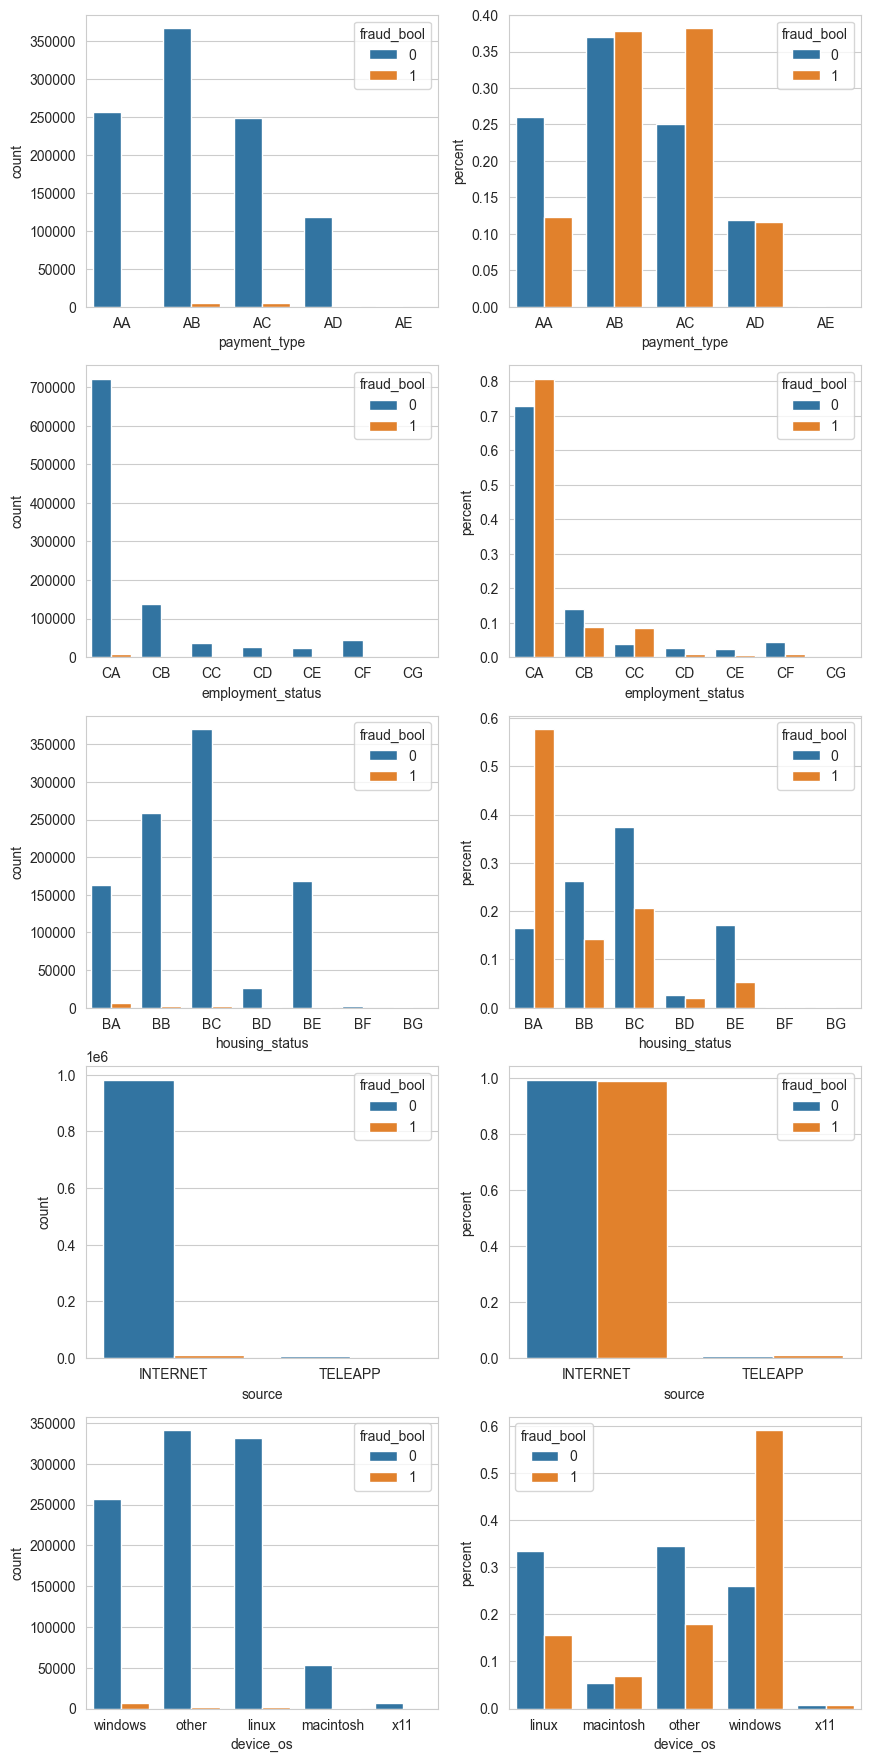

In [40]:
n_height = len(cat_features) # number of images vertically
n_width = 2 # number of images horizontally
figure_size = (10,22) # figure size
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)

for i in range(n_height):
    col = cat_features[i]
    sns.countplot(data=new_df, x=col, hue = "fraud_bool", ax = ax[i,0])
 
    # Calculate percentage and plot barplot
    pct = (new_df.groupby([col,'fraud_bool']).size() / new_df.groupby(['fraud_bool']).size()).reset_index().rename({0:'percent'}, axis=1)
    sns.barplot(x=col, hue='fraud_bool', y='percent', data=pct, ax=ax[i,1])

#     # Set font size for axis labels
#     ax[i, 0].set_xlabel(col, fontsize=40)
#     ax[i, 1].set_xlabel(col, fontsize=40)
# # Set font size for the y-axis label of the second subplot
# ax[0, 1].set_ylabel('Percentage', fontsize=40)
# Show the plot
plt.show()

Notable observations: <br>
1.  "source" has similar distribution, while "device_os", "housing_status", "employment_status", "payment_type" have different distributions between the normal and fraud groups.
2. Fraud applications tend to use windows ("device_os"), have BA "housing_status", compared to normal applications.
3. Applications with CA "employment_status", AC "payment_type" are higher in the fraud group. 

### 3.2 Numerical Columns with nunique < 10

In [41]:
num_features1

['income',
 'customer_age',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'month']

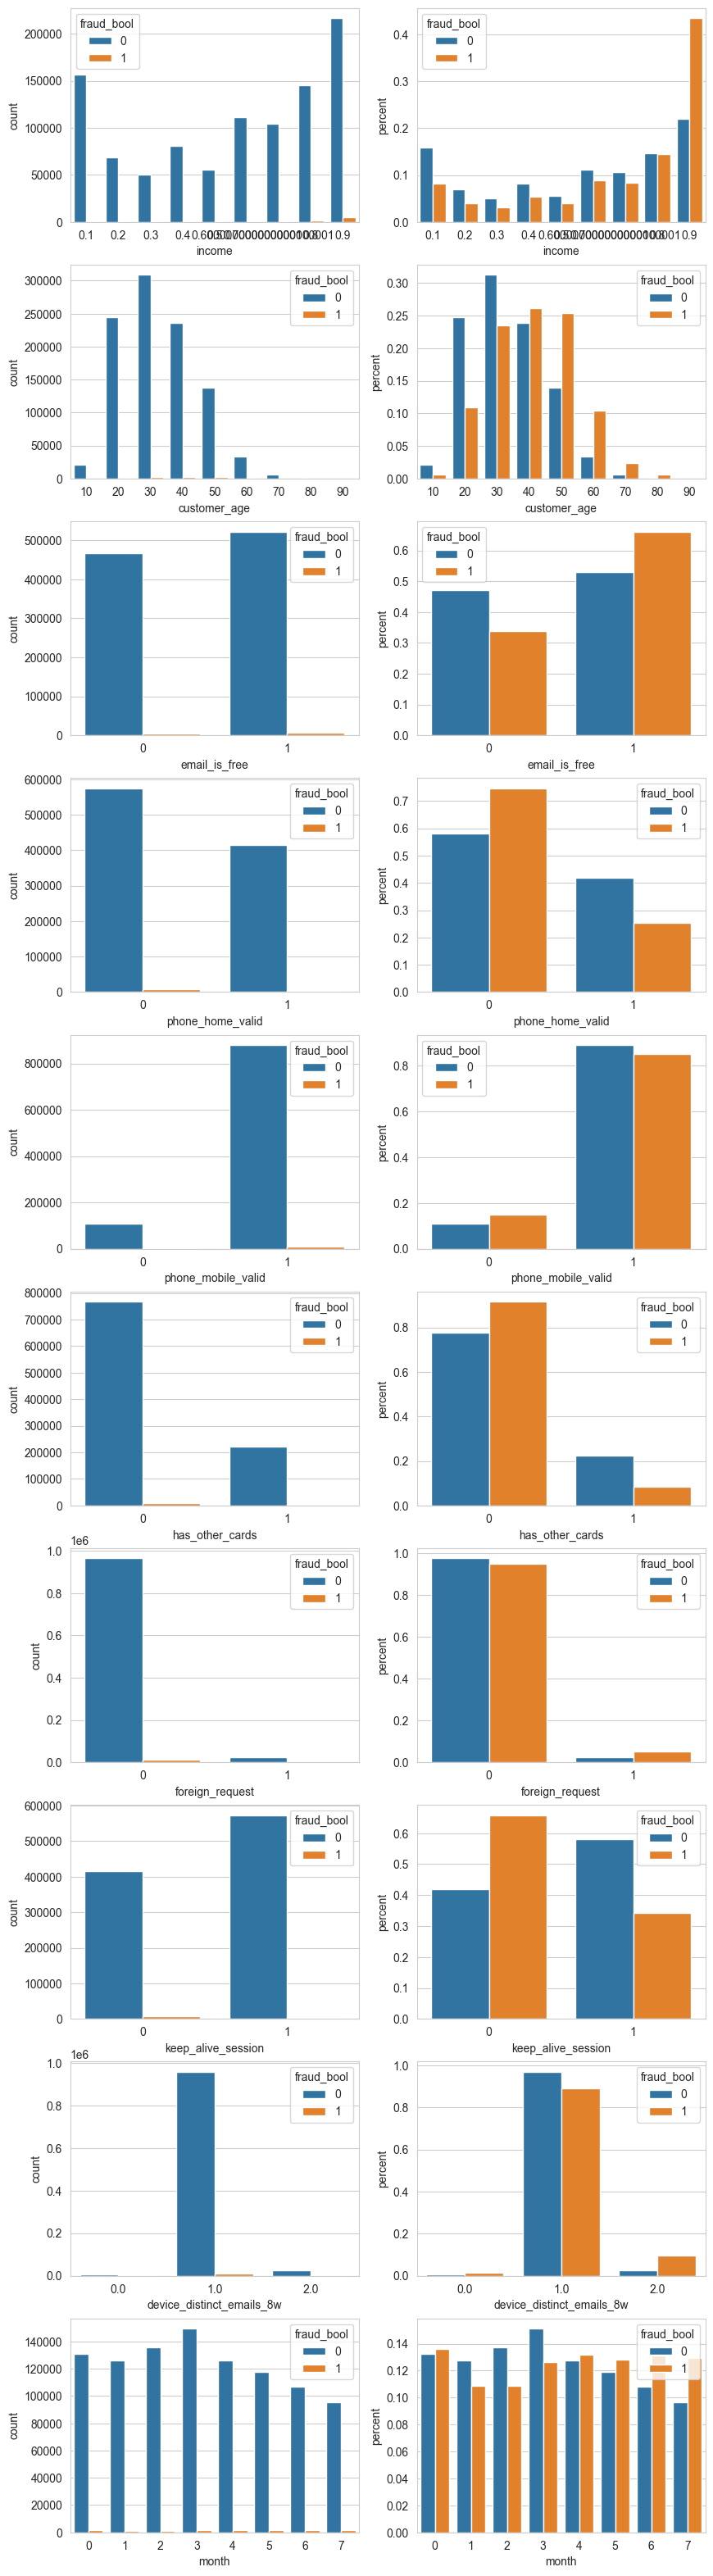

In [99]:
n_height = len(num_features1) # number of images vertically
n_width = 2 # number of images horizontally
figure_size = (10,40) # figure size
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)

for i in range(n_height):
    col = num_features1[i]
    sns.countplot(data=new_df, x=col, hue = "fraud_bool", ax = ax[i,0])
 
    # Calculate percentage and plot barplot
    pct = (new_df.groupby([col,'fraud_bool']).size() / new_df.groupby(['fraud_bool']).size()).reset_index().rename({0:'percent'}, axis=1)
    sns.barplot(x=col, hue='fraud_bool', y='percent', data=pct, ax=ax[i,1])

# Show the plot
plt.show()

#### More data analysis in detail

1).Phone valid sum:

In [29]:
#Create 'phone_valid_sum' column  by summing the values of 'phone_home_valid' and 'phone_mobile_valid'
phone_valid_sum = new_df['phone_home_valid']+new_df['phone_mobile_valid'] 
df_temp = pd.DataFrame({"phone_valid_sum":phone_valid_sum,"fraud_bool":new_df['fraud_bool']})

In [30]:
df_temp['phone_valid_sum'].value_counts()

1    648783
2    328985
0     22232
Name: phone_valid_sum, dtype: int64

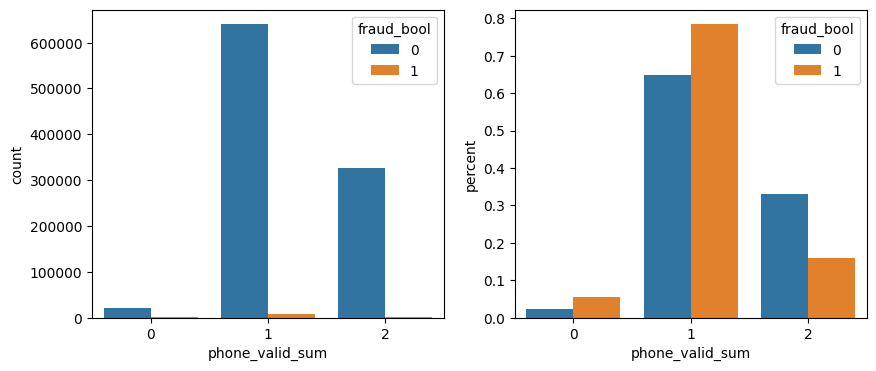

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# plt.figure(figsize=(8, 6))  # Set the figure size

sns.countplot(data=df_temp, x='phone_valid_sum', hue = "fraud_bool", ax = ax[0])
# Calculate percentage and plot barplot
pct = (df_temp.groupby(['phone_valid_sum', 'fraud_bool']).size() / df_temp.groupby(['fraud_bool']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='phone_valid_sum', hue='fraud_bool', y='percent', data=pct, ax=ax[1])

# Show the plot
plt.show()

Combine "phone_home_valid" and "phone_mobile_valid" to one categorical column "phone_valid" (essentially the reverse of one-hot encoding)

In [32]:
df_temp['phone_home_valid'] = new_df['phone_home_valid'].map({0: '0', 1: 'home'})
df_temp['phone_mobile_valid'] = new_df['phone_mobile_valid'].map({0: '0', 1: 'mobile'})

In [33]:
df_temp['phone_valid'] = df_temp['phone_home_valid'].astype(str) + df_temp['phone_mobile_valid'].astype(str)

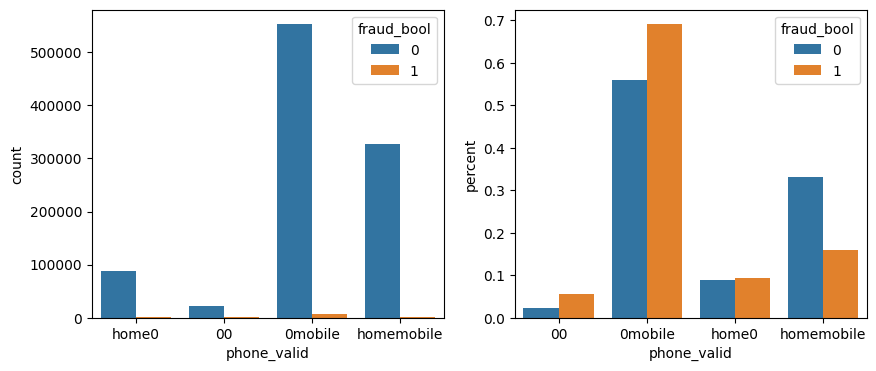

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# plt.figure(figsize=(8, 6))  # Set the figure size

sns.countplot(data=df_temp, x='phone_valid', hue = "fraud_bool", ax = ax[0])
# Calculate percentage and plot barplot
pct = (df_temp.groupby(['phone_valid', 'fraud_bool']).size() / df_temp.groupby(['fraud_bool']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='phone_valid', hue='fraud_bool', y='percent', data=pct, ax=ax[1])

# Show the plot
plt.show()

In [49]:
## Optionally, convert the new column to a categorical type
#df['phone_home_valid'] = pd.Categorical(df['phone_home_valid'])

2).combine source + foreign_request:

In [50]:
new_df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [101]:
df_temp = pd.DataFrame()
df_temp['source'] = new_df['source']
df_temp['foreign_request'] = new_df['foreign_request'].map({0: '0', 1: 'foreign'})
df_temp["fraud_bool"] = new_df["fraud_bool"]

In [102]:
df_temp['source_foreign'] = df_temp['source'].astype(str) + df_temp['foreign_request'].astype(str)

In [103]:
df_temp['source_foreign'].value_counts()

INTERNET0          967780
INTERNETforeign     25172
TELEAPP0             6978
TELEAPPforeign         70
Name: source_foreign, dtype: int64

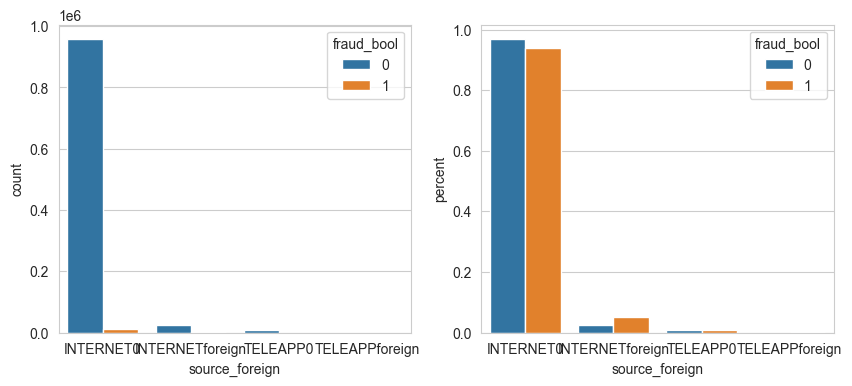

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# plt.figure(figsize=(8, 6))  # Set the figure size

sns.countplot(data=df_temp, x='source_foreign', hue = "fraud_bool", ax = ax[0])
# Calculate percentage and plot barplot
pct = (df_temp.groupby(['source_foreign', 'fraud_bool']).size() / df_temp.groupby(['fraud_bool']).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x='source_foreign', hue='fraud_bool', y='percent', data=pct, ax=ax[1])

# Show the plot
plt.show()

It seems that there's no need to combine "source". won't select "source"

Notable observations: <br>
1. applications with free email, foerign request are higher in the fraud group.
2. applications with other cards, keep alive session are lower in the fraud group.
3. applicantions with only one invalid phone are higher in the fraud group. But it's common for non-fraud applications. It seems to have limited predictive power.<br> 

### 3.3. Continuous Columns (Numerical Columns with nunique >= 10)

In [40]:
num_features2

['name_email_similarity',
 'prev_address_months_count',
 'current_address_months_count',
 'days_since_request',
 'intended_balcon_amount',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes']

In [41]:
len(num_features2)

15

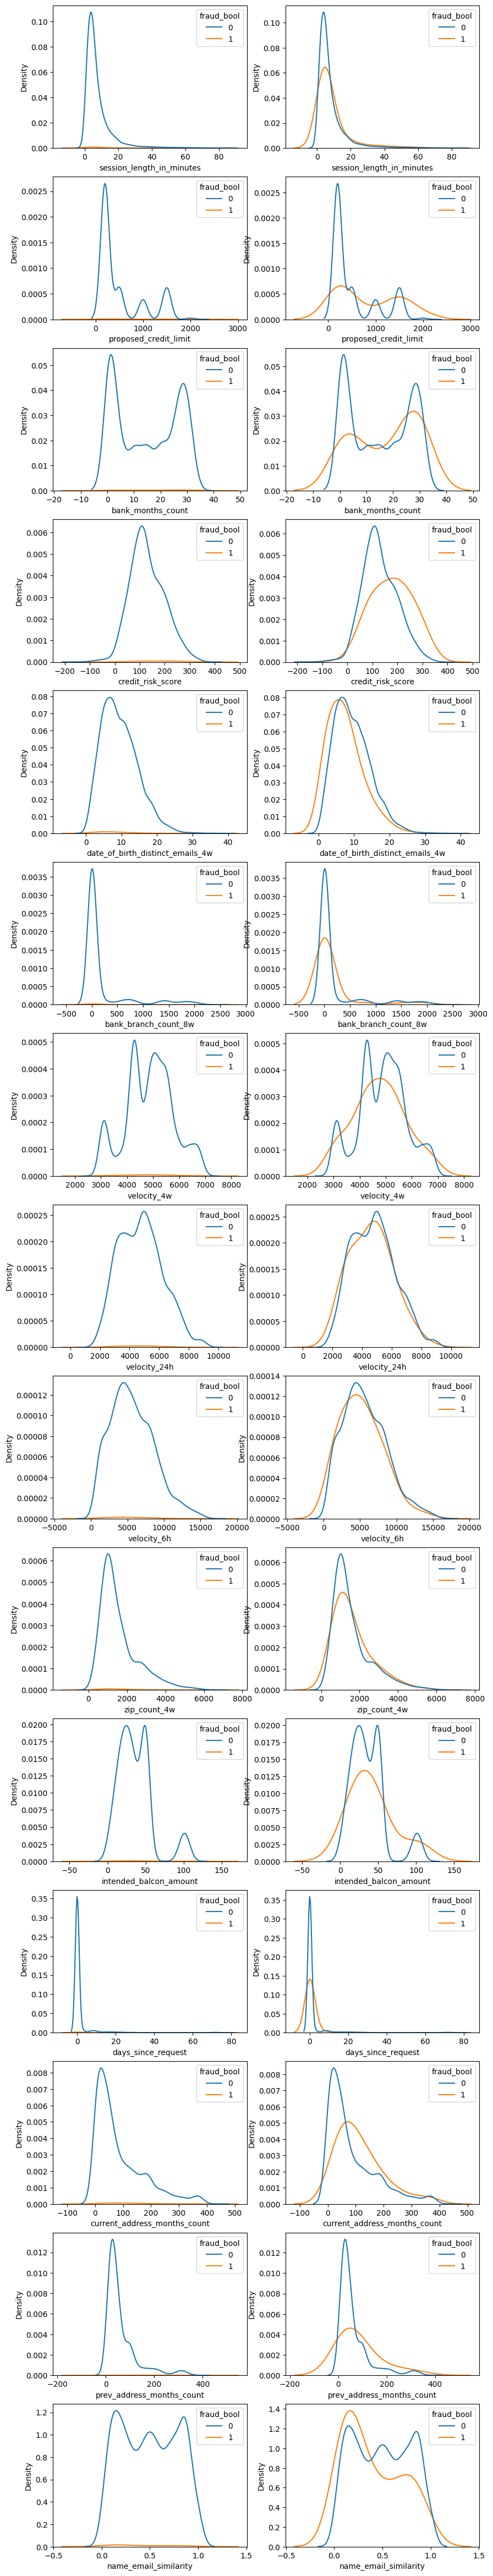

In [42]:
#visualize the distribution of numerical features with KDE plots
n_height = len(num_features2) # number of images vertically
n_width = 2 # number of images horizontally
figure_size = (10,60) # figure size
fig, ax = plt.subplots(n_height, n_width, figsize=figure_size)

for i in range(n_height):
    col = num_features2[::-1][i]
    #KDE plot, bw_adjust adjusts the bandwidth (smoothness) of the kernel density estimate. 
    sns.kdeplot(data=new_df, x=col, hue = "fraud_bool", ax = ax[i,0],bw_adjust=3)
    # KDE plot, each KDE will be normalized independently.
    sns.kdeplot(data=new_df, x=col, hue = "fraud_bool", common_norm=False, ax = ax[i,1], bw_adjust=3 )

# Show the plot
plt.show()

Notable observations: <br>
1. 'income', 'name_email_similarity', 'current_address_months_count', 'credit_risk_score','date_of_birth_distinct_emails_4w' show different distributions between the normal and fraud groups.

## 4.Feature Engineering
create new variables or modify existing ones to improve the performance of models.
feature extraction

Statistical Analysis:
Apply statistical methods to test hypotheses, compare groups, and derive meaningful conclusions. Common statistical techniques include t-tests, chi-square tests, regression analysis, and analysis of variance (ANOVA).

### 4.1 Pearson Correlation Test for Multicollinearity

In [76]:
# Plot Correlation Matrix to check feature dependencies and to remove un-necessory features if necessary while feature engineering
# Plotting heatmap to find any high correlations between variables

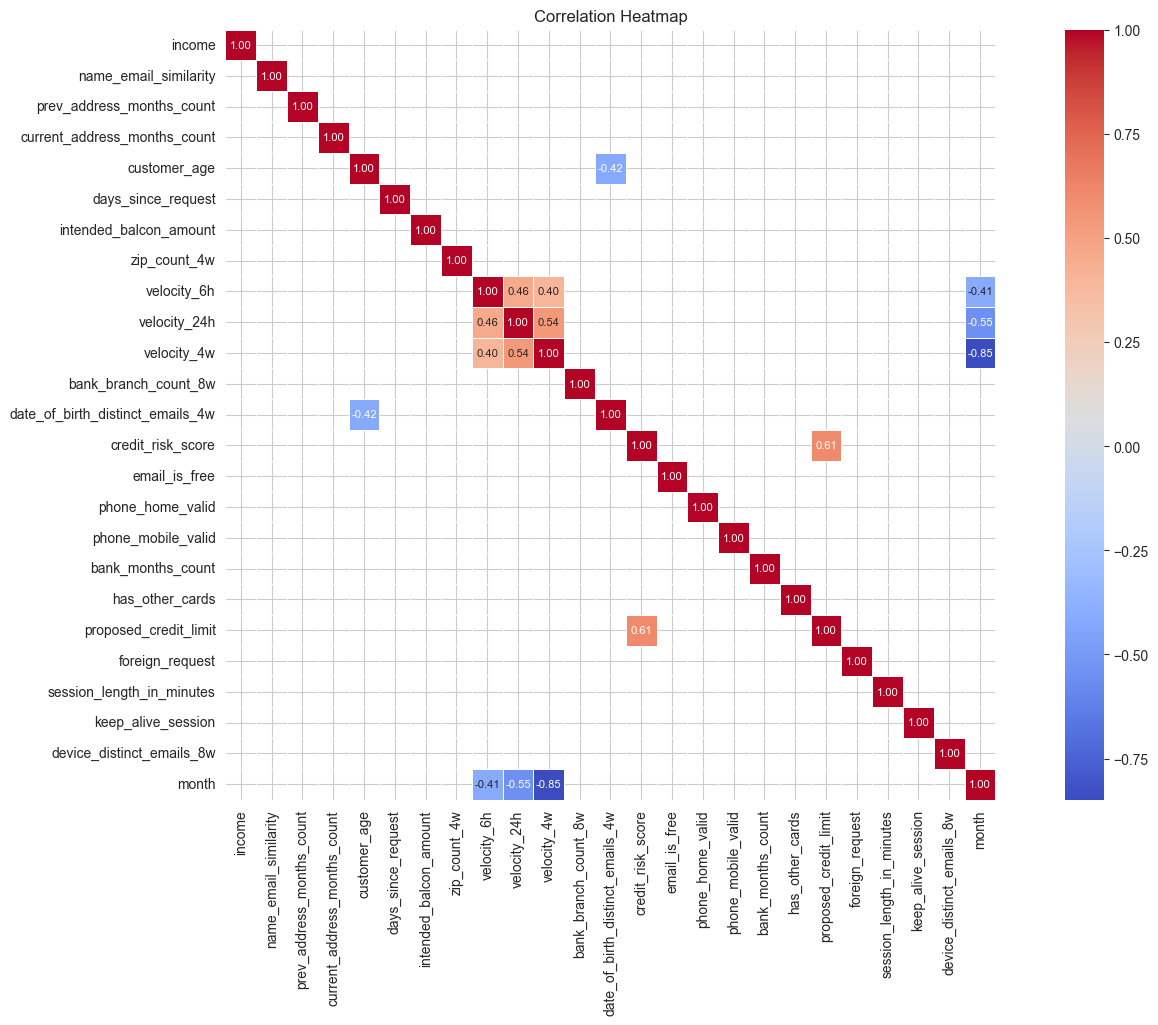

In [77]:
# Compute correlation matrix
new_df_corr = new_df[num_features].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(new_df_corr[(new_df_corr >= 0.4) | (new_df_corr <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

From the heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found:

Time and V3, with a correlation coefficient of -0.42
Amount and V2, with a correlation coefficient of -0.53
Amount and V4, with a correlation coefficient of 0.4. 
Although these correlations are relatively high, the risk of multicollinearity is not expected to be significant. Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

Notable observations:<br>
a strong negative Pearson correlation between 'month' and 'velocity_4w' (-0.85).
1. 'credit_risk_score' correlates with 'proposed_credit_limit'. 
2. 'customer_age' correlates with 'date_of_birth_distinct_emails_4w'.
3. 'velocity_24h' correlates with 'velocity_6h' and 'velocity_4w'.
4. 'month' correlates with 'velocity_24h', 'velocity_6h','velocity_4w'.

Spearman Rank Correlation: -0.8538882409876681


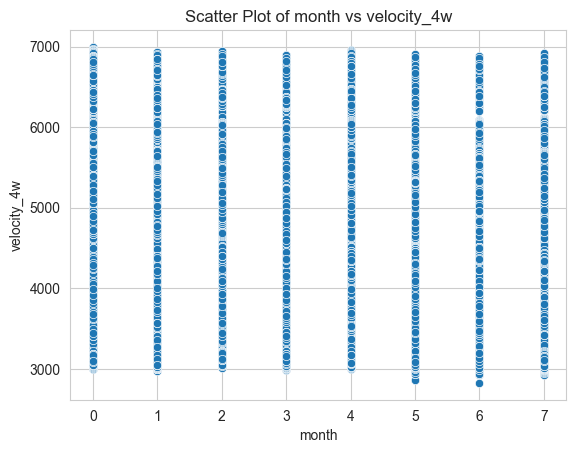

In [78]:
#Explore Non-Linear Relationships between 'month' and 'velocity_4w'
from scipy.stats import spearmanr

# Calculate Spearman rank correlation
spearman_corr, _ = spearmanr(new_df['month'], new_df['velocity_4w'])
print(f"Spearman Rank Correlation: {spearman_corr}")

# Scatter plot with seaborn
sns.scatterplot(x='month', y='velocity_4w', data=new_df)
plt.title('Scatter Plot of month vs velocity_4w')
plt.show()

### 4.2 Chi-squared test for categorical variables and some numerical variables(nunique <10)
- A chi-square test is used to test the independence of two variables.
- In feature selection, we aim to select the features which are highly dependent on the response.

In [ ]:
target = 'fraud_bool'
train_df = new_df[new_df['month'] < 6]
df_temp1 = train_df[cat_features + [target]+ num_features1] 

In [ ]:
#Before performig Ch-Square test we have to make sure data is label encoded.
label_encoder = LabelEncoder()
for i in cat_features:
    df_temp1[i] = label_encoder.fit_transform(df_temp1[i])
    
df_temp1.head()

In [ ]:
X = df_temp1.drop(target,axis=1)
y = df_temp1[target]

In [ ]:
chi_scores = chi2(X,y)
chi_scores

(array([4.41893487e+02, 9.07424037e+02, 3.97432629e+03, 7.70441627e+00,
        2.53700643e+03, 6.11434595e+02, 2.29562113e+02, 1.35430875e+04,
        2.51483267e+02, 6.75899267e+02, 1.94871965e+02, 7.93467662e+02,
        3.94420215e+01, 1.35345790e+01]),
 array([4.19133641e-098, 2.38743539e-199, 0.00000000e+000, 5.50858842e-003,
        0.00000000e+000, 5.45409009e-135, 7.42743428e-052, 0.00000000e+000,
        1.23332617e-056, 5.20832284e-149, 2.74761059e-044, 1.42009151e-174,
        3.37945692e-010, 2.34207919e-004]))

Here first array represents chi square values and second array represnts p-values.
- In general, when the chi-squared score is high and the p-value is low, you have evidence to reject the null hypothesis (no association). In this case, it suggests that all the features are associated with the target variable.        
- High Chi-squared score with a low p-value indicates a highly significant association.

In [ ]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

<Axes: >

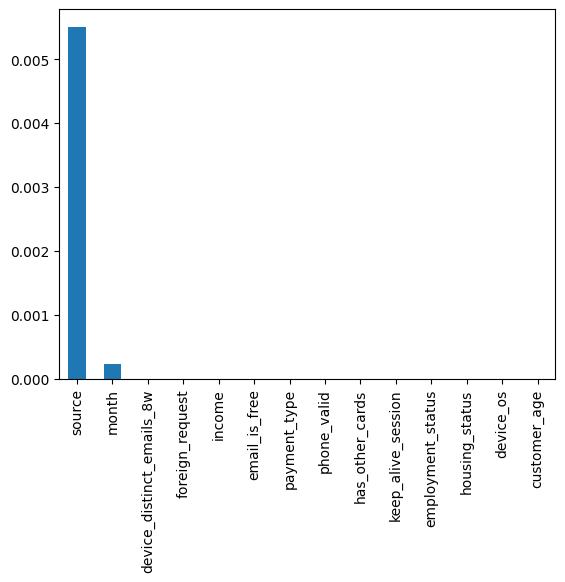

In [ ]:
p_values.plot.bar()

It'll be better to drop "source".